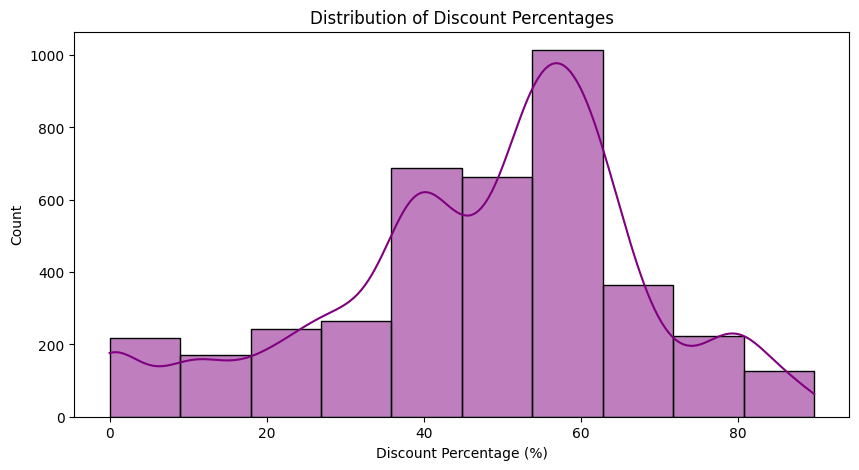

In [3]:
# Part 2:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_ebay_deals.csv')

df_cleaned = df.dropna(subset=['price', 'original_price', 'shipping', 'discount_percentage'])

plt.figure(figsize=(10, 5))
sns.histplot(df['discount_percentage'], bins=10, kde=True, color='purple')
plt.xlabel("Discount Percentage (%)")
plt.title("Distribution of Discount Percentages")
plt.show()


In [4]:
# Part 3
def categorize_discount(p):
    if p <= 10:
        return 'Low'
    elif p <= 30:
        return 'Medium'
    else:
        return 'High'

df_cleaned['discount_bin'] = df_cleaned['discount_percentage'].apply(categorize_discount)

bin_counts = df_cleaned['discount_bin'].value_counts()
print("Original bin counts:\n", bin_counts)

min_count = bin_counts.min()
df_balanced = df_cleaned.groupby('discount_bin').sample(n=min_count, random_state=42)

df_balanced = df_balanced.drop(columns=['discount_bin'])

print("\nBalanced dataset shape:", df_balanced.shape)

Original bin counts:
 discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64

Balanced dataset shape: (783, 7)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_balanced['shipping'] = df_balanced['shipping'].map({
    'Free shipping': 0,
    'Shipping info unavailable': 1
})

X = df_balanced[['price', 'original_price', 'shipping']]
y = df_balanced['discount_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

Mean Absolute Error (MAE): 10.07
Mean Squared Error (MSE): 161.69
Root Mean Squared Error (RMSE): 12.72
R² Score: 0.6726


In [8]:
residuals = y_test - y_pred
metrics_table = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Value': [round(mae, 2), round(mse, 2), round(rmse, 2), round(r2, 4)]
})
print("Regression Evaluation Metrics:\n")
print(metrics_table)

Regression Evaluation Metrics:

  Metric     Value
0    MAE   10.0700
1    MSE  161.6900
2   RMSE   12.7200
3     R²    0.6726


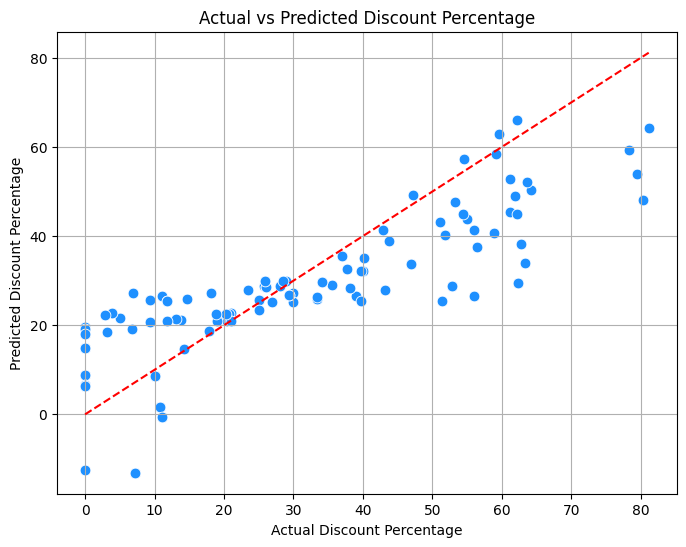

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='w', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Discount Percentage")
plt.ylabel("Predicted Discount Percentage")
plt.title("Actual vs Predicted Discount Percentage")
plt.grid(True)
plt.show()

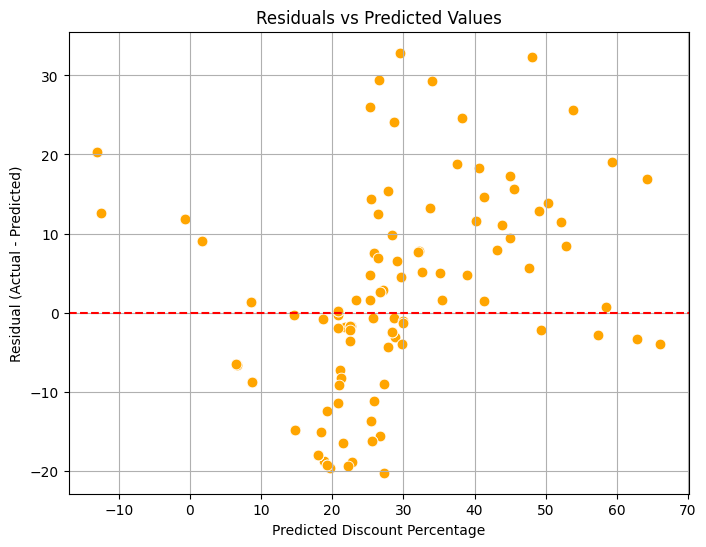

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange', edgecolor='w', s=60)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Discount Percentage")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

In [12]:
df = pd.read_csv('cleaned_ebay_deals.csv')
df_no_discount = df.drop(columns=['discount_percentage'])
df_selected = df_no_discount[['price', 'original_price', 'shipping', 'title']]
df_selected['shipping'] = df_selected['shipping'].map({
    'Free shipping': 0,
    'Shipping info unavailable': 1
})
df_random_20 = df_selected.sample(n=20, random_state=42)
X = df_random_20[['price', 'original_price', 'shipping']]
predicted_discounts = model.predict(X)
df_random_20['Predicted Discount (%)'] = predicted_discounts

<ipython-input-12-40804417bdec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['shipping'] = df_selected['shipping'].map({


In [13]:
results = df_random_20[['title', 'price', 'original_price', 'shipping', 'Predicted Discount (%)']]
display(results)

,title,price,original_price,shipping,Predicted Discount (%)
2355,Apple iPhone 14 128GB Unlocked - Excellent,340.95,799.00,1,37.976857
495,HP ENVY Laptop Intel Core Ultra 7 155U RTX 305...,769.99,1099.99,1,27.158028
3893,Apple iPhone 14 Pro Max 256GB Unlocked Very Go...,559.99,1199.00,1,42.812532
3154,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,161.95,1199.99,0,69.458972
1178,Apple iPhone 16 Pro Max 256GB Unlocked Excelle...,964.99,1699.00,0,46.502821
1767,Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...,332.99,499.99,1,25.838168
1904,Acer PredatorNeo Laptop 16 16GB 1TB NVIDIA GeF...,899.99,2371.82,1,73.528827
1723,Apple iPhone 13 128GB Unlocked - Excellent,285.95,699.00,1,36.781070
2414,Samsung Galaxy S22 Ultra 5G S908U 128GB Unlock...,332.99,499.99,1,25.838168
3662,Samsung Galaxy Watch4 44mm R870 GPS - Good,36.99,299.99,0,38.448934
